# CRISP-DM: Entendimento dos Dados


## SRO (Classificação)


In [19]:
!wget https://github.com/danillogontijo/ifg/raw/main/datasets/soluti/SRO.csv

--2021-11-30 00:14:54--  https://github.com/danillogontijo/ifg/raw/main/datasets/soluti/SRO.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/danillogontijo/ifg/main/datasets/soluti/SRO.csv [following]
--2021-11-30 00:14:54--  https://raw.githubusercontent.com/danillogontijo/ifg/main/datasets/soluti/SRO.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31549247 (30M) [text/plain]
Saving to: ‘SRO.csv.1’

SRO.csv.1           100%[===================>]  30.09M   155MB/s    in 0.2s    

2021-11-30 00:14:54 (155 MB/s) - ‘SRO.csv.1’ saved [31549247/31549247]



## Imports


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [68]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 17, 4

## Carregar Dataset


In [69]:
dataset = pd.read_csv('SRO.csv')

In [70]:
dataset.dtypes

solicitacao_certificado    object
midia_certificado          object
data_suporte               object
motivo_suporte             object
acesso_remoto_suporte      object
cpf                        object
cnpj                       object
dtype: object

In [71]:
# [0] = Quantidade de instâncias
# [1] = Quantidade de atributos
print("O dataset contém ", dataset.shape[0], "instâncias e ", dataset.shape[1], " atributos.")

O dataset contém  289221 instâncias e  7  atributos.


In [72]:
dataset.sample(10)

,solicitacao_certificado,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj
195110,11DE1907095485E9,Nenhum,2020-07-24,CERTILLION ID- DUVIDA NA ALTERAÇÃO DA SENHA,Não,2c5db486379185567afc51c17e60a550,NaN
106227,4B19190102462876,Nenhum,2019-01-03,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,NaN,d32fbefc3b3429edb3153b9bb22b8b7a
188386,11DE200527643481,Nenhum,2020-06-26,BIRD ID- DUVIDA NA BAIXA,Não,4bb6dcefbe910e9774edbc379786ffa4,NaN
4280,10CF170125404203,Token,2017-02-06,TESTAR CERTIFICADO ( E-CAC / CONECTIVIDADE ),Sim,68e3e283450d2da3ea737fb9f4dcdc4f,NaN
35509,111117072665389D,Token,2017-10-03,DUVIDAS NA INSTALAÇÃO DO DRIVER DO TOKEN,Sim,bfa2eaa501c2a434c93b52403350a8b3,NaN
248138,11DE2104135186E3,Nenhum,2021-04-16,BIRD ID- ACOMPANHAMENTO DE CHAMADO,Não,ef154ad9f11b4c6954dcc967dabd1fc0,NaN
104639,106E170901546EBD,Token,2018-12-18,DUVIDAS NA INSTALAÇÃO DO DRIVER DO TOKEN,Sim,a2977894ab6aa4d23595c387c1f13abb,NaN
227463,11DE18022734B99B,Cartão,2021-01-12,A3- DUVIDA NA UTILIZAÇÃO,Sim,NaN,3e18ad323850e14ad853f3e1770e3a97
15550,105D17041941347A,Nenhum,2017-05-16,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,NaN,0bfca35392f8868184a3074cc7a45ef4
66371,11DE1803206B601F,Token,2018-04-24,ERRO NO EMISSOR NOTAS,Sim,NaN,75a3ae37d0a5d127a2e84dd41b5c67e2


In [73]:
dataset.describe()

,solicitacao_certificado,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj
count,289221,289221,289221,289221,289221,143793,145436
unique,189802,4,1456,188,2,80985,86478
top,111117082158140B,Nenhum,2021-05-04,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,0b79023c2c72f928b89d8c5a33988858,be10358225c6bc8e6e53f6ef2053ded6
freq,43,165109,412,35635,208113,68,32


### Verificar presença de valores nulos


In [74]:
# Quantidade absoluta
totalNulos = (dataset.isnull()).sum()
totalNulos

solicitacao_certificado         0
midia_certificado               0
data_suporte                    0
motivo_suporte                  0
acesso_remoto_suporte           0
cpf                        145428
cnpj                       143785
dtype: int64

###Separar atributos numéricos e categóricos

In [75]:
# Percentual
percentualNulos = (totalNulos / len(dataset)) * 100
percentualNulos

solicitacao_certificado     0.000000
midia_certificado           0.000000
data_suporte                0.000000
motivo_suporte              0.000000
acesso_remoto_suporte       0.000000
cpf                        50.282656
cnpj                       49.714578
dtype: float64

In [76]:
dataset['data_suporte']= pd.to_datetime(dataset['data_suporte'])
dataset['data_suporte'] = dataset['data_suporte'].astype('int64') // 10**9
# dataset['solicitacao_certificado'].astype(str)

In [77]:
categoricos = dataset[['midia_certificado', 'motivo_suporte', 'acesso_remoto_suporte']].columns #(dataset.select_dtypes(include=['object'])).columns
categoricos

Index(['midia_certificado', 'motivo_suporte', 'acesso_remoto_suporte'], dtype='object')

### Visualizar distribuição dos dados (atributos categóricos)

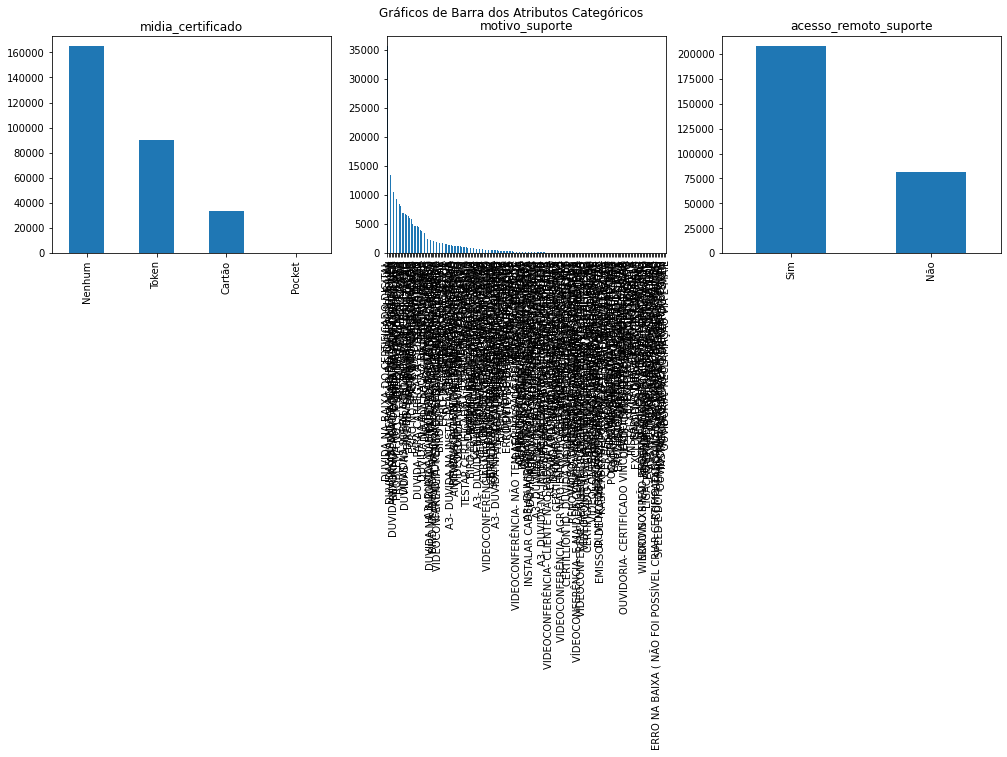

In [78]:
fig, ax = plt.subplots(ncols=len(categoricos), nrows=1)
plt.suptitle("Gráficos de Barra dos Atributos Categóricos")

# Gráfico para cada atributo categórico
for i in range(0, len(categoricos)):
    feature = categoricos[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

## Tipos de Motivos do Suporte

In [79]:
dataset.groupby(['motivo_suporte']).count()


,solicitacao_certificado,midia_certificado,data_suporte,acesso_remoto_suporte,cpf,cnpj
motivo_suporte,,,,,,
A1- ACOMPANHAMENTO DE CHAMADO,347,347,347,347,110,237
A1- ALTERAÇÃO DA SENHA,1703,1703,1703,1703,553,1150
A1- DUVIDA NA BAIXA,23278,23278,23278,23278,6633,16647
A1- DUVIDA NA EXPORTAÇÃO,1007,1007,1007,1007,289,718
A1- DUVIDA NA UTILIZAÇÃO,6003,6003,6003,6003,2444,3559
...,...,...,...,...,...,...
VIDEOCONFERÊNCIA- CLIENTE NÃO APTO,59,59,59,59,37,22
VÍDEOCONFERÊNCIA- CLIENTE COM ERRO PARA AGENDAR,33,33,33,33,22,11
VÍDEOCONFERÊNCIA- CLIENTE COM ERRO PARA ANEXAR DOCUMENTOS,38,38,38,38,24,14


> Existem 188 tipos diferentes de motivos



# CRISP-DM: Preparação dos Dados


## Imports

In [80]:
from sklearn.model_selection import train_test_split

## Descartar identificador

In [81]:
dataset.drop(['solicitacao_certificado'], axis=1, inplace=True)
dataset.head()

,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj
0,Cartão,1483660800,TESTAR CERTIFICADO ( E-CAC / CONECTIVIDADE ),Não,NaN,ee4f8938a136f9c867a621961a03fbfb
1,Nenhum,1483660800,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,NaN,a70460cb1943cad9269d7ce8d8138d9f
2,Nenhum,1483660800,DUVIDA NA INSTALAÇÃO DO CERTIFICADO DIGITAL (A1),Sim,NaN,a70460cb1943cad9269d7ce8d8138d9f
3,Token,1483660800,DUVIDA NA BAIXA DO DRIVER,Não,NaN,e84c38a2a768af7ad0f4fdc6257a212c
4,Token,1483660800,DUVIDAS NA INSTALAÇÃO DO DRIVER DO TOKEN,Não,NaN,e84c38a2a768af7ad0f4fdc6257a212c


## Separar conjuntos de treino (70%) e validação (30%)


In [82]:
train, teste_split = train_test_split(dataset.copy(), test_size=0.3)
train

,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj
282094,Token,1631577600,A3- DUVIDA NA INSTALAÇÃO DO DRIVER (EPASS2003),Não,ac95c86c8958283b9948b6ca13e8a48e,NaN
63084,Token,1522713600,CARTÃO/TOKEN BLOQUEADO,Sim,NaN,449aebacb5f56db4e81641d8a6836123
150183,Nenhum,1572393600,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,NaN,bb81902e4e4a1d2497b46fc72661ae72
659,Token,1484265600,DUVIDA PARA CARREGAR A DLL CARTÃO/TOKEN,Sim,b7e1c67ca0bf7cf3b7c2543d5a4a9acd,NaN
214817,Nenhum,1603843200,A1- PERCA DA SENHA,Sim,6477c73e09ac474f9a34728ac16b4965,NaN
...,...,...,...,...,...,...
217562,Token,1605225600,DUVIDA NA REVOGAÇÃO,Não,dae53556963125ac1d8aa37bb1b673b8,NaN
245509,Nenhum,1617753600,A1- DUVIDA NA BAIXA,Sim,NaN,67031ecc647d9d81b9551043f020f977
251748,Nenhum,1620000000,A1- INSTALAÇÃO,Sim,74cd3075eada5ec46296f687d689c3cd,NaN
204370,Nenhum,1599004800,A1- INSTALAÇÃO,Sim,NaN,9a2d818065e0bac7820701d477c13dfb


### Tratar valores nulos

In [83]:
train.isnull().sum()

midia_certificado             0
data_suporte                  0
motivo_suporte                0
acesso_remoto_suporte         0
cpf                      101796
cnpj                     100652
dtype: int64

In [84]:
# Imputando valor zero onde nao tem cpf ou cnpj
for col in train[['cpf','cnpj']].columns:
    train[col] = np.where(train[col].isnull(), 0, 1)

train

,midia_certificado,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj
282094,Token,1631577600,A3- DUVIDA NA INSTALAÇÃO DO DRIVER (EPASS2003),Não,1,0
63084,Token,1522713600,CARTÃO/TOKEN BLOQUEADO,Sim,0,1
150183,Nenhum,1572393600,DUVIDA NA BAIXA DO CERTIFICADO DIGITAL,Sim,0,1
659,Token,1484265600,DUVIDA PARA CARREGAR A DLL CARTÃO/TOKEN,Sim,1,0
214817,Nenhum,1603843200,A1- PERCA DA SENHA,Sim,1,0
...,...,...,...,...,...,...
217562,Token,1605225600,DUVIDA NA REVOGAÇÃO,Não,1,0
245509,Nenhum,1617753600,A1- DUVIDA NA BAIXA,Sim,0,1
251748,Nenhum,1620000000,A1- INSTALAÇÃO,Sim,1,0
204370,Nenhum,1599004800,A1- INSTALAÇÃO,Sim,0,1


In [85]:
train.isnull().sum()

midia_certificado        0
data_suporte             0
motivo_suporte           0
acesso_remoto_suporte    0
cpf                      0
cnpj                     0
dtype: int64

## Converter variáveis categóricas em dummies (One Hot Encoding)


In [86]:
train_dumies = pd.get_dummies(data=train, columns=['midia_certificado'])

# Acesso Remoto Binário 1-Sim e 0-Não
train_dumies['acesso_remoto_suporte'] = train_dumies['acesso_remoto_suporte'].map({'Sim': 1, 'Não': 0})

# Converte coluna motivo_suporte (target) para valores numéricos categóricos 
train_dumies['motivo_suporte'] = train_dumies['motivo_suporte'].astype('category')
cat_columns = train_dumies.select_dtypes(['category']).columns
train_dumies[cat_columns] = train_dumies[cat_columns].apply(lambda x: x.cat.codes)

train = train_dumies
train

,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj,midia_certificado_Cartão,midia_certificado_Nenhum,midia_certificado_Pocket,midia_certificado_Token
282094,1631577600,17,0,1,0,0,0,0,1
63084,1522713600,51,1,0,1,0,0,0,1
150183,1572393600,81,1,0,1,0,1,0,0
659,1484265600,94,1,1,0,0,0,0,1
214817,1603843200,9,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
217562,1605225600,88,0,1,0,0,0,0,1
245509,1617753600,2,1,0,1,0,1,0,0
251748,1620000000,7,1,1,0,0,1,0,0
204370,1599004800,7,1,0,1,0,1,0,0


# CRISP-DM: Modeling

## Imports

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Separar data target e features de treinamento

In [88]:
X = train.drop(['motivo_suporte'], axis=1)
# X.drop(['data_suporte'], axis=1, inplace=True)
y = train['motivo_suporte']
print(X.shape)
print(y.shape)
X

(202454, 8)
(202454,)


,data_suporte,acesso_remoto_suporte,cpf,cnpj,midia_certificado_Cartão,midia_certificado_Nenhum,midia_certificado_Pocket,midia_certificado_Token
282094,1631577600,0,1,0,0,0,0,1
63084,1522713600,1,0,1,0,0,0,1
150183,1572393600,1,0,1,0,1,0,0
659,1484265600,1,1,0,0,0,0,1
214817,1603843200,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
217562,1605225600,0,1,0,0,0,0,1
245509,1617753600,1,0,1,0,1,0,0
251748,1620000000,1,1,0,0,1,0,0
204370,1599004800,1,0,1,0,1,0,0


In [89]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

# CRISP-DM: Avaliação

## Imports


In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, mean_squared_error

## Preparar os dados de validação

In [90]:
# Imputando valor zero onde nao tem cpf ou cnpj
for col in teste_split[['cpf','cnpj']].columns:
    teste_split[col] = np.where(teste_split[col].isnull(), 0, 1)

teste_dumies = pd.get_dummies(data=teste_split, columns=['midia_certificado'])

# Acesso Remoto Binário 1-Sim e 0-Não
teste_dumies['acesso_remoto_suporte'] = teste_dumies['acesso_remoto_suporte'].map({'Sim': 1, 'Não': 0})

# Converte coluna motivo_suporte (target) para valores numéricos categóricos 
teste_dumies['motivo_suporte'] = teste_dumies['motivo_suporte'].astype('category')
cat_columns = teste_dumies.select_dtypes(['category']).columns
teste_dumies[cat_columns] = teste_dumies[cat_columns].apply(lambda x: x.cat.codes)

teste_split = teste_dumies
teste_split

,data_suporte,motivo_suporte,acesso_remoto_suporte,cpf,cnpj,midia_certificado_Cartão,midia_certificado_Nenhum,midia_certificado_Pocket,midia_certificado_Token
232918,1612483200,16,1,1,0,0,0,0,1
134787,1563753600,93,1,0,1,0,0,0,1
80367,1531785600,86,0,0,1,0,1,0,0
136780,1565049600,78,0,0,1,0,1,0,0
257983,1621987200,17,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
247629,1618358400,42,0,1,0,0,1,0,0
89851,1536019200,78,1,0,1,0,1,0,0
15264,1494547200,147,1,1,0,0,0,0,1
184899,1591747200,16,1,1,0,0,0,0,1


## Separar data target e features

In [91]:
X = teste_split.drop(['motivo_suporte'], axis=1)
y = teste_split['motivo_suporte']
print(X.shape)
print(y.shape)

(86767, 8)
(86767,)


,data_suporte,acesso_remoto_suporte,cpf,cnpj,midia_certificado_Cartão,midia_certificado_Nenhum,midia_certificado_Pocket,midia_certificado_Token
232918,1612483200,1,1,0,0,0,0,1
134787,1563753600,1,0,1,0,0,0,1
80367,1531785600,0,0,1,0,1,0,0
136780,1565049600,0,0,1,0,1,0,0
257983,1621987200,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
247629,1618358400,0,1,0,0,1,0,0
89851,1536019200,1,0,1,0,1,0,0
15264,1494547200,1,1,0,0,0,0,1
184899,1591747200,1,1,0,0,0,0,1


## Realizar predição para conjunto de validação

In [98]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

## Calcular métricas de classificação


In [96]:
accuracy_score(y, y_pred)

0.11621929996427213

### MSE

In [103]:
print('Mean Squared Error:', mean_squared_error(y, y_pred))

Mean Squared Error: 1575.3388269733884


## Micro e Macro-F1

In [104]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.00      0.00      0.00       527
           2       0.40      0.78      0.53      6885
           3       0.00      0.00      0.00       328
           4       0.10      0.02      0.03      1865
           5       0.32      0.04      0.07       610
           6       0.00      0.00      0.00        50
           7       0.06      0.01      0.01      1319
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00       310
          10       0.00      0.00      0.00       342
          11       0.00      0.00      0.00       288
          12       0.00      0.00      0.00        33
          13       0.05      0.01      0.02       452
          14       0.08      0.02      0.03        90
          15       0.14      0.08      0.10      1453
          16       0.34      0.74      0.46      3188
          17       0.12    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [109]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.         0.         0.40101447 0.         0.0955414  0.32
 0.         0.05982906 0.         0.         0.         0.
 0.         0.05405405 0.07692308 0.13938619 0.33590734 0.12442396
 0.         0.16666667 0.1        0.         0.12571429 0.17448276
 0.01449275 0.17209909 0.         0.02564103 0.19735328 0.02758621
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02589257 0.08812261
 0.11857708 0.01792619 0.         0.         0.         0.04545455
 0.04316547 0.         0.08474576 0.00734694 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04       0.         0.         0.00990602 0.         0.10447761
 0.         0.         0.01554404 0.         0.         0.01960784
 0.         0.         0.         0.         0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
